In [1]:
import numpy as np
import pandas as pd
import random
import os, shutil
import datetime, time, fnmatch

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import colors
from matplotlib import animation
from matplotlib import rc
rc('animation', html='html5')

from Ecosystem import Ecosystem

cmap = colors.ListedColormap(['White','Blue','Green','Red'])

# #normalizes colour range values 
n = colors.Normalize(vmin=0,vmax=3)

In [2]:
#Create directory for animations
dirName = "archive"
if not os.path.exists(dirName):
    os.makedirs(dirName)

In [3]:
def saveVideo(exp, video):
    t = time.localtime()
    timestamp = time.strftime('%b-%d-%Y-%H%M%S', t)
    fileName = (exp + "-" + timestamp + '.mp4')

    video.save(fileName)
    shutil.move(fileName,dirName)

In [4]:
## Declarations
rows=20

#Population of Species
numFoxes=10
numRabbits=20
numMushrooms=50

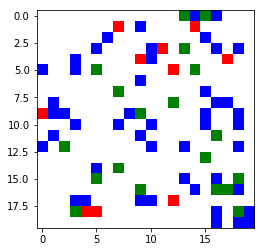

In [5]:
# Create the first ecosystem: super basic
eco = Ecosystem(rows, hunting=True)

## Initialise and Spawn species
    
# Foxes
eco.createFoxes(numFoxes, maxHunger=15)

# Rabbits
eco.createRabbits(numRabbits, maxHunger=12)

# Mushrooms
eco.createMushrooms(numMushrooms)

# Save initial state of the forest
initState = eco.saveInitState()

# Show the initial state of the forest
data = eco.mapToGrid()
eco.plotGrid(data)

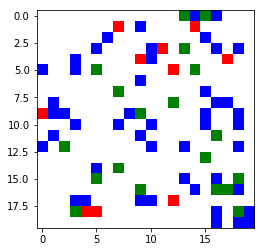

In [6]:
maxFrames = 2000
anim = eco.animate(maxFrames)

In [7]:
anim

In [8]:
saveVideo("exp1", anim)

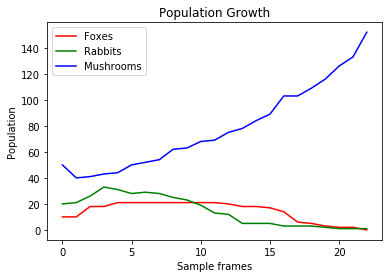

In [9]:
eco.plotPopulationHist()

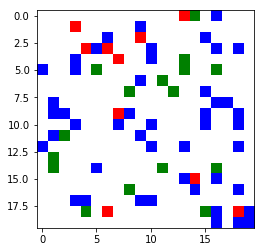

In [10]:
# Make a second ecosystem where foxes are omnivores
eco2 = Ecosystem(rows, omni=True)

# Create the species in the same locations as eco
eco2.createFoxes(numFoxes, maxHunger=15, locations=initState["foxes"])
eco2.createRabbits(numRabbits, maxHunger=12, locations=initState["rabbits"])
eco2.createMushrooms(numMushrooms, locations=initState["mushrooms"])

data2 = eco2.mapToGrid()
eco2.plotGrid(data2)

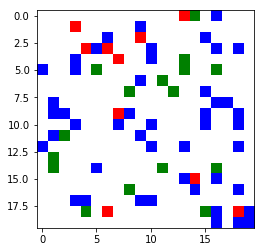

In [11]:
maxFrames = 2000
anim2 = eco2.animate(maxFrames)

In [12]:
anim2

In [13]:
saveVideo("exp2", anim2)

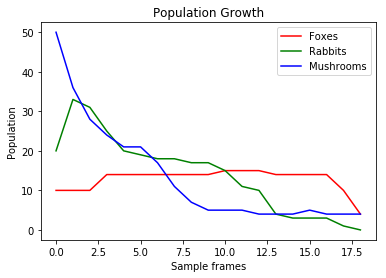

In [14]:
eco2.plotPopulationHist()